In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100 , random_state=42)
svc_clf = SVC(gamma = "scale" , random_state = 42, probability = True)
voting_clf = VotingClassifier(
    estimators=[('LR', log_clf), ('rf' , rnd_clf), ('svc' , svc_clf)],
    voting = "hard"
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [12]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf , voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [13]:
voting_clf = VotingClassifier(
    estimators=[('LR', log_clf), ('rf' , rnd_clf), ('svc' , svc_clf)],
    voting = "soft"
)

In [14]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf , voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier() , n_estimators= 500 , max_samples= 100 , bootstrap= True , n_jobs=-1 )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [16]:
print(accuracy_score(y_test, y_pred))

0.904


In [17]:
tree_clf = DecisionTreeClassifier(random_state= 42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [25]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [23]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test , y_pred)

0.912

In [26]:
bag_clf.oob_decision_function_

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459],
       [0.01754386, 0.98245614],
       [0.97109827, 0.02890173],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.7173913 , 0.2826087 ],
       [0.85026738, 0.14973262],
       [0.97222222, 0.02777778],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97837838, 0.02162162],
       [0.94642857, 0.05357143],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.39473684, 0.60526316],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62569832, 0.37430168],
       [0.

In [27]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [28]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators= 500 , max_leaf_nodes= 16 , n_jobs= -1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [29]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes = 16),
    n_estimators= 500 , random_state= 42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [31]:
np.sum(y_pred == y_pred_rf)/len(y_pred)

0.992

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators= 500 , n_jobs= -1)
rnd_clf.fit(iris["data"], iris["target"])
for name,score in zip(iris["feature_names"] , rnd_clf.feature_importances_):
    print(name , round(score*100 , 2))

sepal length (cm) 10.11
sepal width (cm) 2.53
petal length (cm) 43.02
petal width (cm) 44.34


In [37]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier

mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist['data']
y = mnist['target']
y = y.astype(int)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=25, n_jobs=-1)
rnd_clf.fit(X, y)

for i, j in zip(y, rnd_clf.feature_importances_):
    print(i, j)


/Users/bruh/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


5 0.0
0 0.0
4 0.0
1 0.0
9 0.0
2 0.0
1 0.0
3 0.0
1 0.0
4 0.0
3 0.0
5 0.0
3 0.0
6 0.0
1 0.0
7 0.0
2 0.0
8 0.0
6 0.0
9 0.0
4 0.0
0 0.0
9 0.0
1 0.0
1 0.0
2 0.0
4 0.0
3 0.0
2 0.0
7 0.0
3 0.0
8 0.0
6 0.0
9 0.0
0 0.0
5 0.0
6 0.0
0 0.0
7 0.0
6 0.0
1 0.0
8 0.0
7 0.0
9 0.0
3 0.0
9 0.0
8 0.0
5 0.0
9 0.0
3 0.0
3 0.0
0 0.0
7 0.0
4 0.0
9 0.0
8 0.0
0 0.0
9 0.0
4 0.0
1 0.0
4 0.0
4 0.0
6 0.0
0 0.0
4 0.0
5 0.0
6 2.8107576974836734e-05
1 0.00010014843944553206
0 3.193138347758812e-05
0 0.00014861900668064433
1 0.00015945057069985166
7 0.00014431887170117792
1 0.00023292323420485677
6 0.0
3 3.935729016189694e-05
0 0.0
2 0.0
1 0.0
1 0.0
7 0.0
9 0.0
0 0.0
2 0.0
6 0.0
7 0.0
8 0.0
3 0.0
9 0.0
0 0.0
4 0.0
6 0.0
7 0.0
4 0.0
6 0.0
8 9.12449490647009e-05
0 0.00019839901645793789
7 0.0004277524266091299
8 0.00109857566242384
3 0.0024135456601202233
1 0.002682575788856469
5 0.003492194994124826
7 0.00319209517413262
1 0.001366193622636303
7 0.0009624691706499265
1 3.2175177130192623e-05
1 2.61372241813082e-05
6 0.0

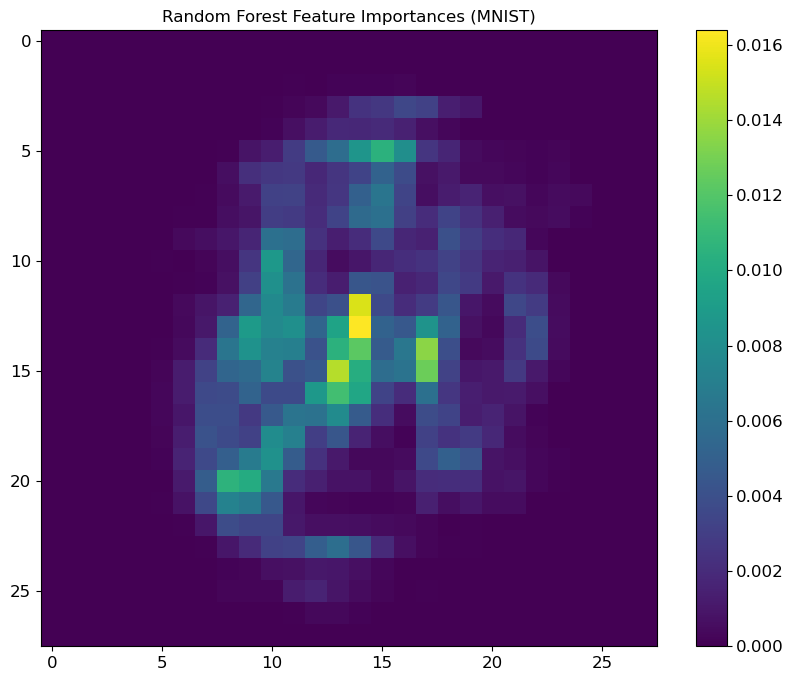

In [38]:
importances = rnd_clf.feature_importances_
importances_matrix = importances.reshape(28, 28)

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(importances_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Forest Feature Importances (MNIST)')
plt.show()

Saving figure mnist_feature_importance_plot


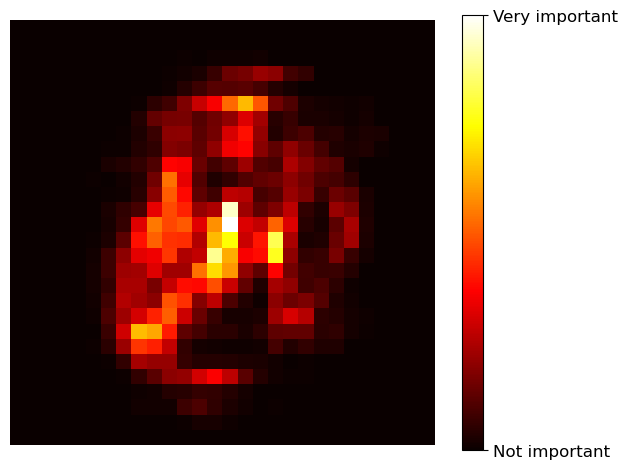

In [39]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1) , n_estimators= 200 , algorithm= "SAMME.R" , learning_rate= 0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

InvalidIndexError: (slice(None, None, None), 0)

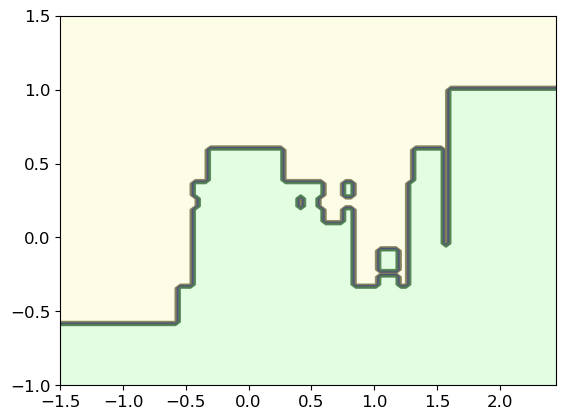

In [45]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_decision_boundary(ada_clf, X, y)

In [49]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth= 2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [50]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X , y2)

DecisionTreeRegressor(max_depth=2)

In [51]:
y3 = y2 - tree_reg1.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X , y3)

DecisionTreeRegressor(max_depth=2)

In [52]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [53]:
y_pred

array([0.03991297])

Saving figure gradient_boosting_plot


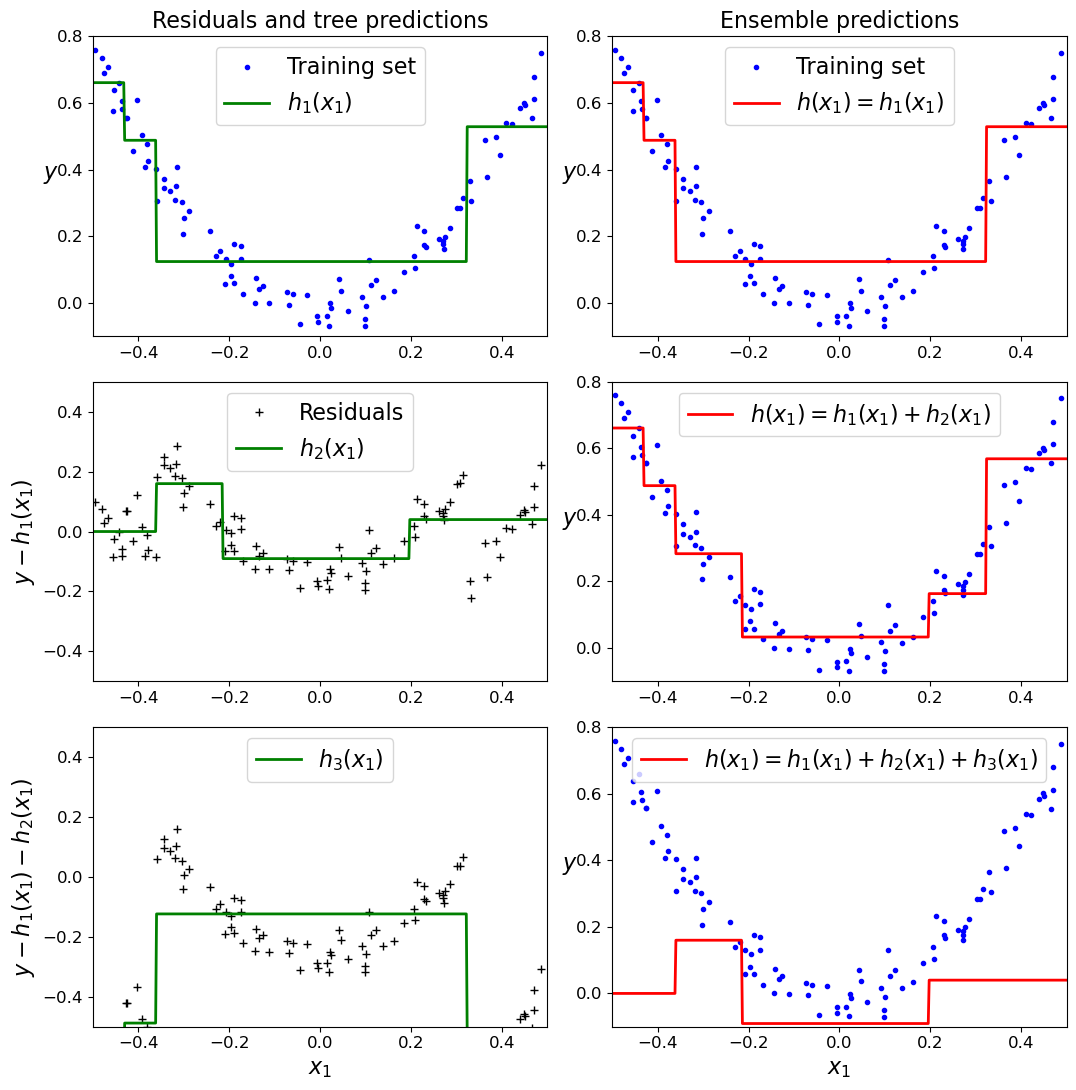

In [54]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [56]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

Saving figure gbrt_learning_rate_plot


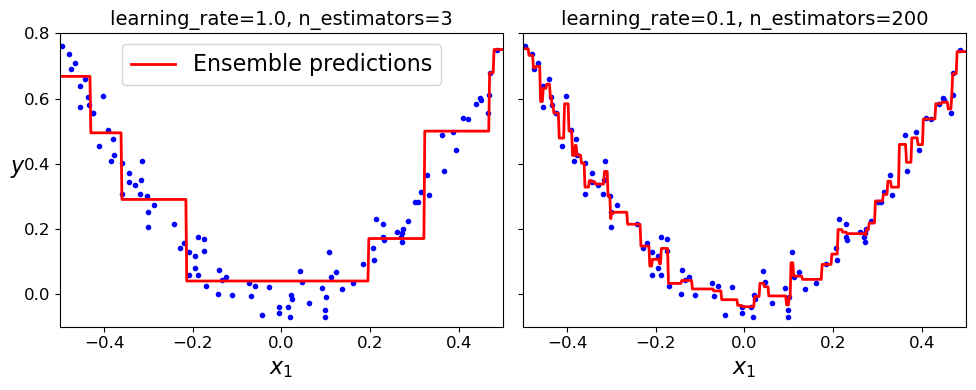

In [57]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

save_fig("gbrt_learning_rate_plot")
plt.show()

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train , X_val , y_train , y_val = train_test_split(X , y)
gbrt = GradientBoostingRegressor(max_depth = 2 , n_estimators = 120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val , y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth = 2 , n_estimators = bst_n_estimators)
gbrt_best.fit(X_train , y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=52)

In [59]:
min_error = np.min(errors)

Saving figure early_stopping_gbrt_plot


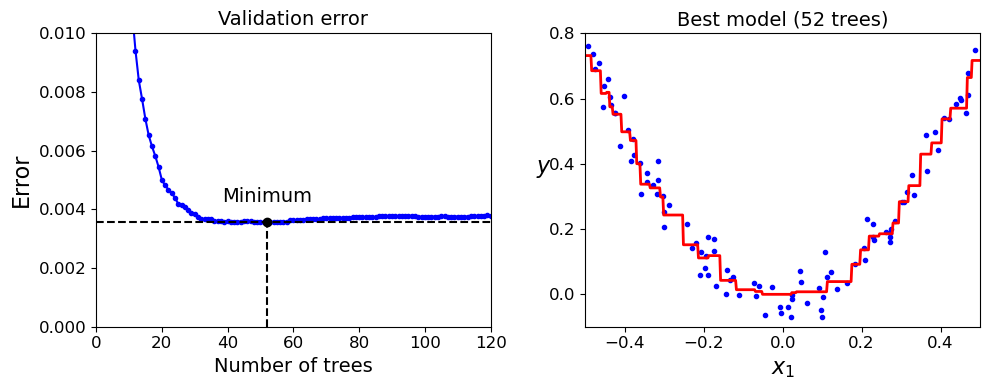

In [60]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

save_fig("early_stopping_gbrt_plot")
plt.show()

In [61]:
gbrt = GradientBoostingRegressor(max_depth=2 , warm_start= True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [62]:
print(gbrt.n_estimators)

47


In [63]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.0035540712919882983


In [65]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [69]:
if xgboost is not None:
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)  

Validation MSE: 0.0039984110306231085


In [75]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=10)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)            # Not shown

[0]	validation_0-rmse:0.21083
[1]	validation_0-rmse:0.14897
[2]	validation_0-rmse:0.11373
[3]	validation_0-rmse:0.09167
[4]	validation_0-rmse:0.07759
[5]	validation_0-rmse:0.06909
[6]	validation_0-rmse:0.06445
[7]	validation_0-rmse:0.06278
[8]	validation_0-rmse:0.06152
[9]	validation_0-rmse:0.06114
[10]	validation_0-rmse:0.06077
[11]	validation_0-rmse:0.06146
[12]	validation_0-rmse:0.06154
[13]	validation_0-rmse:0.06121
[14]	validation_0-rmse:0.06218
[15]	validation_0-rmse:0.06181
[16]	validation_0-rmse:0.06192
[17]	validation_0-rmse:0.06213
[18]	validation_0-rmse:0.06213
[19]	validation_0-rmse:0.06246
Validation MSE: 0.0036926766442669746


/Users/bruh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [72]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

13.5 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

9.98 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ext_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svc_clf = LinearSVC(random_state=42, max_iter=100, tol=20)
mlp_clf = MLPClassifier(random_state=42)
estimators = [rnd_clf, ext_clf, svc_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)
[estimator.score(X_val, y_val) for estimator in estimators]
from sklearn.ensemble import VotingClassifier

named_estimators = [('rnd_clf', rnd_clf),
                    ('ext_clf', ext_clf),
                    ('svc_clf', svc_clf),
                    ('mlp_clf', mlp_clf)
                    ]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
print(voting_clf.score(X_val, y_val))
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

/Users/bruh/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)


/Users/bruh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training the MLPClassifier(random_state=42)


/Users/bruh/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.9716


[0.9692, 0.9709, 0.859, 0.966]